In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [39]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [40]:
#For this workbook, we wil be working with the left outside linebacker position
lolb = df[df['Position'] == 'LOLB']

In [41]:
#First, we will reomve the non-numeric values
#Once we have those, we sill start the VIF testing
lolbcols = list(lolb.columns.values)

In [42]:
print(lolbcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [44]:
lolb.corr()

,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Unnamed: 0,1.000000,-0.341625,-0.124324,-0.233890,-0.061704,-0.357621,0.205158,-0.144930,-0.122978,-0.117579,...,-0.103007,0.039446,0.023439,-0.001346,-0.049830,-0.069627,-0.126991,0.086869,0.106398,0.134507
Acceleration,-0.341625,1.000000,0.363688,-0.035597,0.257964,0.067072,0.042827,0.193663,0.201533,0.231645,...,-0.119279,0.087907,0.077514,0.007220,0.111665,0.109668,0.236460,-0.059900,-0.023245,-0.319988
Agility,-0.124324,0.363688,1.000000,0.049687,0.437521,-0.008158,0.298824,0.481268,0.424982,0.414317,...,-0.020680,0.160622,0.255551,-0.194092,0.183325,-0.175160,0.190605,-0.173859,-0.059614,-0.167656
Awareness,-0.233890,-0.035597,0.049687,1.000000,-0.202871,0.448873,0.056171,-0.165227,0.017430,-0.079122,...,0.092011,-0.182110,0.240547,0.054637,0.104755,0.055903,0.110100,-0.115288,-0.079942,-0.147199
Ball Carrier Vision,-0.061704,0.257964,0.437521,-0.202871,1.000000,-0.005189,0.377514,0.596674,0.480989,0.608541,...,0.023070,0.596231,0.112595,-0.154855,0.111967,-0.143187,0.133384,-0.075018,-0.208147,-0.140308
Block Shedding,-0.357621,0.067072,-0.008158,0.448873,-0.005189,1.000000,-0.095111,-0.027813,-0.046894,-0.062147,...,0.330787,-0.024398,-0.026791,0.174134,0.093130,0.194057,0.098165,-0.070681,-0.070116,-0.045711
Carrying,0.205158,0.042827,0.298824,0.056171,0.377514,-0.095111,1.000000,0.390019,0.494621,0.266963,...,-0.134443,0.380670,0.287992,-0.176478,0.033807,-0.113768,0.006258,-0.084127,-0.148939,-0.093896
Catch In Traffic,-0.144930,0.193663,0.481268,-0.165227,0.596674,-0.027813,0.390019,1.000000,0.554923,0.488278,...,-0.112838,0.395876,0.209470,-0.235548,0.041005,-0.179408,0.094920,-0.222421,-0.237148,-0.180955
Catching,-0.122978,0.201533,0.424982,0.017430,0.480989,-0.046894,0.494621,0.554923,1.000000,0.346031,...,-0.010760,0.432496,0.419224,-0.403422,0.057291,-0.162467,0.104624,-0.181136,-0.285144,-0.204150
Elusiveness,-0.117579,0.231645,0.414317,-0.079122,0.608541,-0.062147,0.266963,0.488278,0.346031,1.000000,...,-0.030546,0.336811,0.146614,-0.136204,0.064303,-0.035898,0.115175,-0.067562,-0.110045,-0.158621


In [45]:
#Removing non-numeric columns
lolb1 = lolb[['Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic',
              'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping',
              'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 
              'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed',
              'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid',
              'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt',
              'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']]

In [46]:
lolbcorr = lolb1.corr()

In [47]:
lolbpos = lolbcorr[lolbcorr['Overall Rating'] >= 0.50]

In [48]:
lolbneg = lolbcorr[lolbcorr['Overall Rating'] <= -0.5]

In [49]:
print(lolbpos['Overall Rating'])
#These are all of the significant positive correlations

Awareness           0.926301
Block Shedding      0.575609
Overall Rating      1.000000
Play Recognition    0.926625
Pursuit             0.694499
Tackle              0.627672
Name: Overall Rating, dtype: float64


In [50]:
print(lolbneg['Overall Rating'])
#There are no significant negative correlations

Series([], Name: Overall Rating, dtype: float64)


In [51]:
lolbsig = lolb[['Awareness', 'Block Shedding', 'Play Recognition', 'Pursuit', 'Tackle']]

In [53]:
X = add_constant(lolbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#First, we will remove Play Recognition

const               365.169171
Awareness            14.168290
Block Shedding        1.461402
Play Recognition     14.918851
Pursuit               1.832835
Tackle                1.700152
dtype: float64

In [54]:
lolbsig1 = lolb[['Awareness', 'Block Shedding', 'Pursuit', 'Tackle']]

In [56]:
X = add_constant(lolbsig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now, we can move on to statistical testing

const             353.101052
Awareness           1.665377
Block Shedding      1.461368
Pursuit             1.726430
Tackle              1.700132
dtype: float64

In [60]:
LOLB = sm.OLS(lolb['Overall Rating'], lolbsig1).fit()
print(LOLB.summary())
##It looks like our varaibles are all significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.456e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          5.26e-225
Time:                        21:44:03   Log-Likelihood:                -355.53
No. Observations:                 157   AIC:                             719.1
Df Residuals:                     153   BIC:                             731.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Awareness          0.4859      0.017     27.

In [62]:
def model():
    pv= 0.4859*lolb['Awareness']+ 0.1378*lolb['Block Shedding'] + 0.2140*lolb['Pursuit'] + 0.1334 * lolb['Tackle']
    return pv

In [63]:
lolb['Predicted Value'] = model()
lolb['Residual'] = lolb['Predicted Value'] - lolb['Overall Rating']

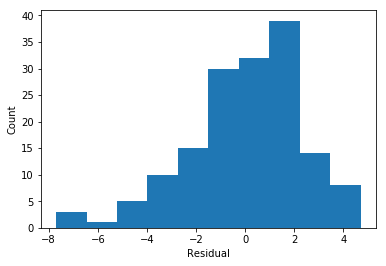

In [64]:
plt.hist(lolb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

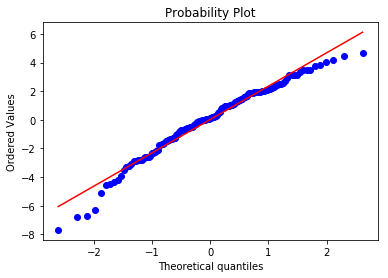

In [65]:
stats.probplot(lolb['Residual'], plot=plt)
plt.show()
#The residuals look pretty evenly distributed but there might be a few outliers.  Let's check the influence plot and see

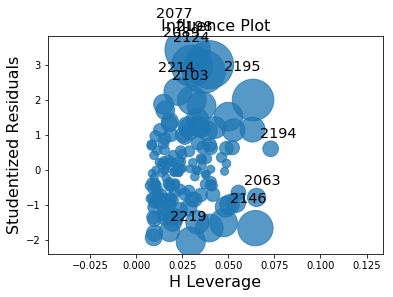

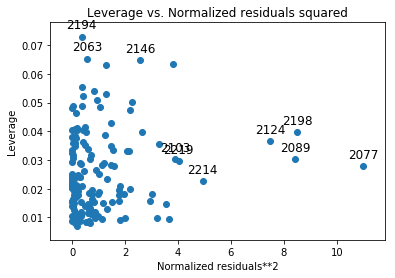

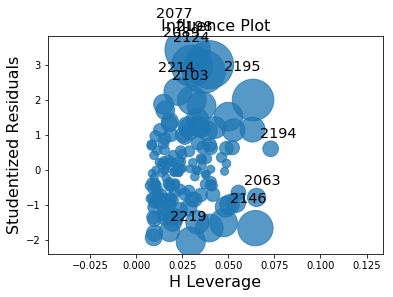

In [66]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LOLB)
influence_plot(LOLB)
#There are some points that have high residuals but they appear to also have pretty low leverage so we will keep them
#Let's drop them though and see what it does to the model

In [80]:
lolbul = lolb.drop(df.index[[2077, 2198, 2124, 2089, 2198, 2195]])
print(lolb.shape, lolbul.shape)                            

(157, 54) (152, 54)


In [81]:
lolbulsig  = lolbul[['Awareness', 'Block Shedding', 'Pursuit', 'Tackle']]
lolbulclean = lolbul[['Overall Rating', 'Awareness', 'Block Shedding', 'Pursuit', 'Tackle']]

In [82]:
print(LOLB.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.456e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          5.26e-225
Time:                        21:57:44   Log-Likelihood:                -355.53
No. Observations:                 157   AIC:                             719.1
Df Residuals:                     153   BIC:                             731.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Awareness          0.4859      0.017     27.

In [83]:
LOLB1 = sm.OLS(lolbulclean['Overall Rating'], lolbulsig).fit()
print(LOLB1.summary())
#It looks like removing the leverage points reduced the AIC score by about 50 points

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.298e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          1.07e-225
Time:                        21:57:48   Log-Likelihood:                -323.54
No. Observations:                 152   AIC:                             655.1
Df Residuals:                     148   BIC:                             667.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Awareness          0.4729      0.016     30.

In [84]:
def model():
    pv = 0.4769*lolbulclean['Awareness'] + 0.1128*lolbulclean['Block Shedding']+ 0.2223* lolbulclean['Pursuit']+ 0.1527*lolbulclean['Tackle']
    return pv

In [85]:
lolbulclean['Predicted Value'] = model()
lolbulclean['Residual'] = lolbulclean['Predicted Value'] - lolbulclean['Overall Rating']

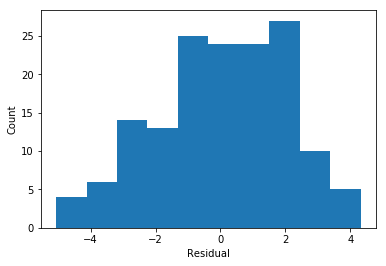

In [86]:
plt.hist(lolbulclean['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

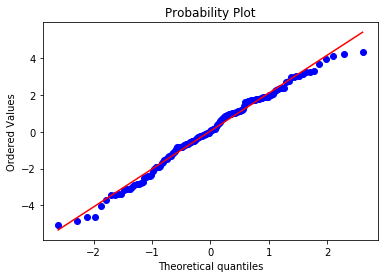

In [87]:
stats.probplot(lolbulclean['Residual'], plot=plt)
plt.show()
#The residuals appear to be evenly distributed

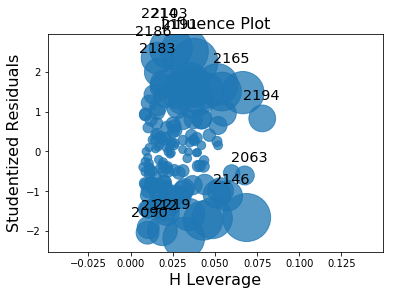

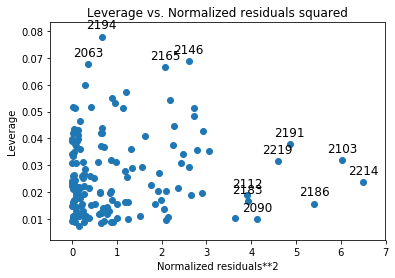

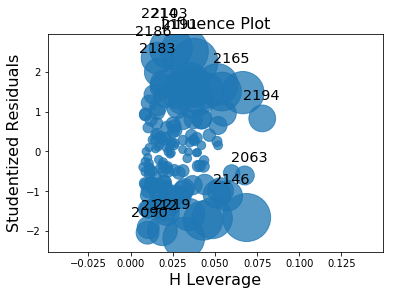

In [88]:
plot_leverage_resid2(LOLB1)
influence_plot(LOLB1)
#It looks like the data isnt being too heavily weighted by any one point

In [89]:
#Finally, we will check for homoskedasticity with the breusch-pagan test
het_breuschpagan(lolbulclean['Residual'], lolbulsig)
#It looks that are p-values are essentially 0 so we can reject the null that there is heteroskedasticity

(58.717501337752175,
 1.1045782027611157e-12,
 23.28998022837137,
 6.023870097550174e-15)

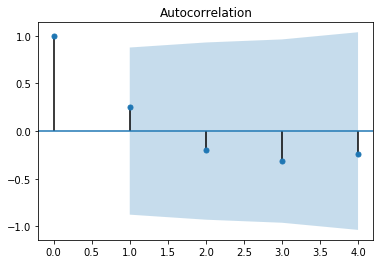

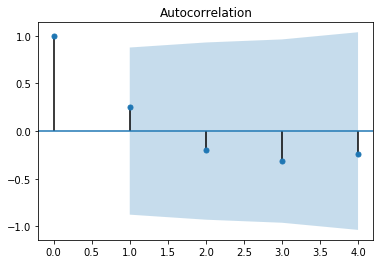

In [92]:
lolbcorr2 = lolbulclean[['Overall Rating', 'Awareness', 'Block Shedding', 'Pursuit', 'Tackle']].corr()
plot_acf(lolbcorr2['Overall Rating'])
#THere does not appear to be a significant amount of autocorrelation in the model

In [93]:
X_train, X_test, y_train, y_test = train_test_split(lolbulsig, lolbulclean['Overall Rating'], test_size = 0.3, random_state =42)

In [94]:
reg= LinearRegression()

In [95]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
lolbcv = cross_val_score(reg, lolbulsig, lolbulclean['Overall Rating'], cv = 5)

In [99]:
lolbcv_mean = np.mean(lolbcv)

In [100]:
print(lolbcv, lolbcv_mean)
#It looks like our model explains an average of 89.5% of the variation in the model

[0.91753828 0.9420455  0.9153484  0.9175919  0.79846582] 0.898197979860354


In [102]:
lolbdesc = lolbulclean[['Overall Rating', 'Awareness', 'Block Shedding', 'Pursuit', 'Tackle', 'Predicted Value', 'Residual']]
lolbdesc1 = lolbdesc.describe()
lolbdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\lolbdesc1.csv')